

# Project: Jeseit Bank Personal Loan Prediction

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">ML Modeling</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION
> Jeseits Bank wants to explore ways of converting its liability customers to personal loan customers. The bank ran a campaign last year for liability customers and showed a healthy conversion rate of over 9% success. Thus the retail marketing department wants to devise campaigns with better target marketing to increase the success ratio with minimal budget.




-----------------------------------------------------
## PROBLEM OVERVIEW
> The file bank-data.csv contains data on 5000 of Jeseits bank customers. It includes their demographic information, the customer's response to the last personal loan campaign which showed that only about 9.6% accepted the personal loan offered during the previous campaign.

Thus, Jeseits Bank wants to explore their data to obtain insigts from their customer database and acquire a model that would predict the likelihood of a liability customer buying personal loans.



-----------------------------------------------------
## DATA DICTIONARY

 
1.   Age: Customer's age in completed years.            
2.   Experience: Years of Professional Experience
3.   Income: Annual Income of the customer ($000)
4.   ZIP Code: Home address ZIP code            
5.   Family: Family Size of the customer               
6.   CCAvg:   Average Spending on credit cards per month
7.   Education: Education Level 1: Undergrad, 2: Graduate, 3: Advanced/Professional. 
8.   Mortgage: Value of house mortgage if any (000).  
9.   Personal Loan: Did the customer accep the personal loan offered in the last campaign. 
10.  Securities Account: Does the customer have a securities account with the bank.
11.  CD Account: Does the customer have a Certificate of Deposit.
12.  Online: Does the customer use internet banking facilities.
13.  CreditCard: Does the customer use a credit card issued by the bank.        


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data set

df = pd.read_csv('bank-data.csv')

In [3]:
# overview of the first 5 rows
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
# overview of the last 5 rows

df.tail()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [5]:
# Viewing the data-types and number of records

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# identifying number of unique values in each feature

df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
# checking for null values

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [9]:
# checking for duplicate values

df[df.duplicated()]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [10]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Notes

>
- The data does not contain duplicate rows or null values
- For columns; Income, CCAvg and mortgage, we would be multiplying by $1000 so as to maintain the original orientation of the dataset
- Rename the CCAvg columns to Avg CardSpends for clarity

In [11]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [12]:
df['Income'] = df['Income'] * 1000

In [13]:
df['CCAvg'] = df['CCAvg'] * 1000

In [14]:
df['Mortgage'] = df['Mortgage'] * 1000

In [15]:
df.rename(columns = {'CCAvg' : 'Avg CardSpends'}, inplace = True)

In [16]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
Avg CardSpends        float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [17]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  Avg CardSpends  Education  \
0   1   25           1   49000     91107       4          1600.0          1   
1   2   45          19   34000     90089       3          1500.0          1   
2   3   39          15   11000     94720       1          1000.0          1   
3   4   35           9  100000     94112       1          2700.0          2   
4   5   35           8   45000     91330       4          1000.0          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   1           0       0           0  
1         0              0                   1           0       0           0  
2         0              0                   0           0       0           0  
3         0              0                   0           0       0           0  
4         0              0                   0           0       0           1

<a id='eda'></a>
## EXPLORATORY DATA ANALYSIS

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family',
       'Avg CardSpends', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
# splitting the data into numerical and categorical features

num = [ 'Age', 'Experience', 'Income', 'Avg CardSpends',
        'Mortgage']

cat = ['Family', 
       'Education',  'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

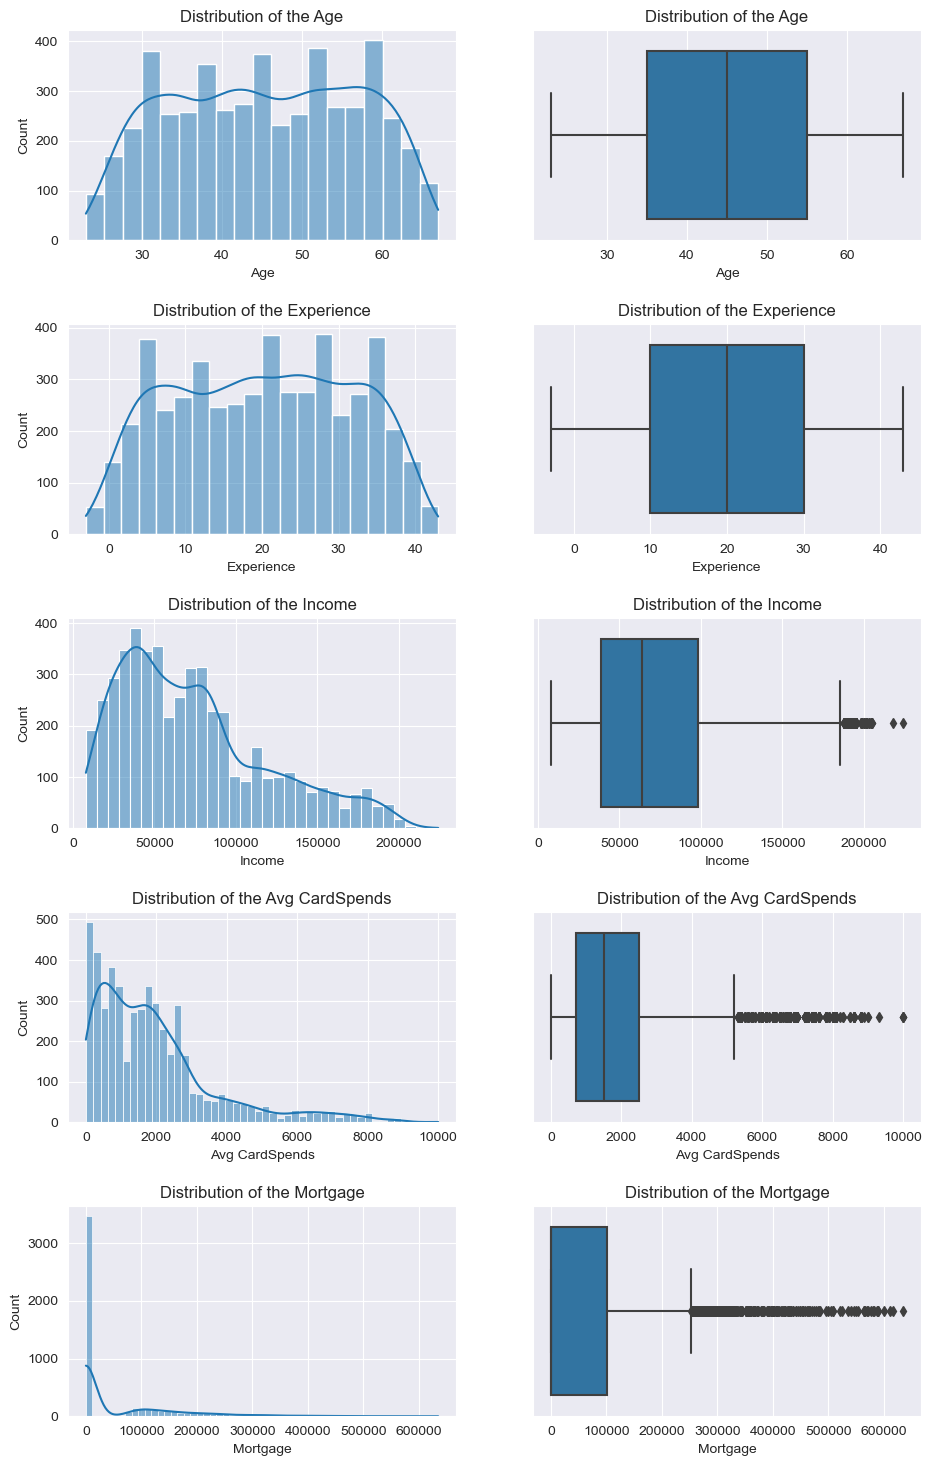

In [20]:
# Visualizing numerical data

fig , ax = plt.subplots(5, 2, figsize = (11, 18))
plt.subplots_adjust(hspace= 0.4)

for index, i in enumerate(num):
    
    # histogram of numerical features
    sns.histplot(data = df, x = i, ax = ax[index, 0], kde = True)
    ax[index, 0].set_title(f'Distribution of the {i}')
    
    # boxplot of numerical features
    sns.boxplot(data = df, x = i, ax = ax[index, 1])
    ax[index, 1].set_title(f'Distribution of the {i}')
    
plt.show()

## Notes

- The age and experience level of Jeseits Bank Customers are evenly distributed, with the histogram showing a normal distribution.<br><br>

- The income and monthly average amount spent via cards is right skewed showing that 75% of their customers earn less than `$100,000 annually, with an average monthly spending amount less than $4,000`. There are some outlierws depicting some bank customers earning well over `$150000 and spending over $5000 on cards`.  <br><br>

- Most of Jeseits do not possess mortgage. The distribution shows the presence of outliers (Fewer customers with mortgages greater than $250,000).<br><br>

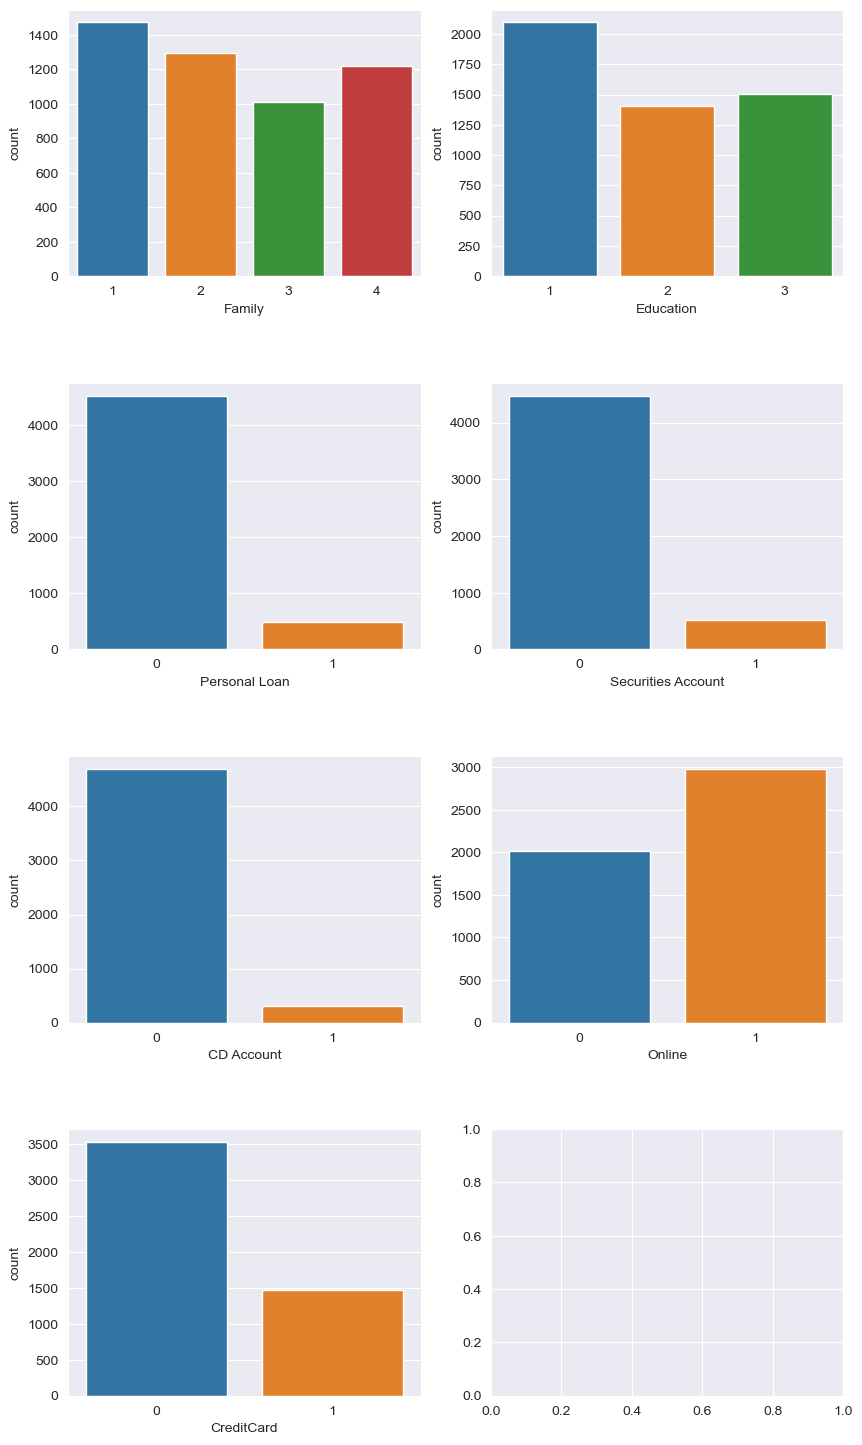

In [21]:
# Visualizing categorical features

fig , ax = plt.subplots(round(len(cat)/2), 2, figsize = (10, 18))
plt.subplots_adjust(hspace= 0.4)

ax = ax.flatten()

for i, col in enumerate(cat):
    
    sns.countplot(data = df, x = col, ax = ax[i])

plt.show()

## Notes
<br><br>
<span style="font-size:19px;">


- Most of the customers belong to Level 1 in terms of education, with a distribution of family members from 1 to 4.<br><br>
- Roughly 90% of customers do not possess securities account or a Certificate of Deposit.<br><br>
- 60% of customers utilize Jeseits online banking system.<br><br>
- 29% of customers own a credit card.<br><br>
- From the previous campaign, about 9% of customers signed up for the personal loan subscription.<br><br>
</span>


> Considering the uneven distribution of Personal loan subscribers (10:90), we thus have to balance the dataset inorder to optmize model performance and ensure adequate representation of the minority class.


In [22]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  Avg CardSpends  Education  \
0   1   25           1   49000     91107       4          1600.0          1   
1   2   45          19   34000     90089       3          1500.0          1   
2   3   39          15   11000     94720       1          1000.0          1   
3   4   35           9  100000     94112       1          2700.0          2   
4   5   35           8   45000     91330       4          1000.0          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   1           0       0           0  
1         0              0                   1           0       0           0  
2         0              0                   0           0       0           0  
3         0              0                   0           0       0           0  
4         0              0                   0           0       0           1

In [23]:
np.sort(df['Age'].unique())

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], dtype=int64)

In [24]:
len(df['Age'].unique())

45

In [25]:
df['Age_Group'] = df['Age'].apply(lambda x : 'Youth' if x <=35 else ('Adult' if x<=50 else 'Elder' ))

In [26]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  Avg CardSpends  Education  \
0   1   25           1   49000     91107       4          1600.0          1   
1   2   45          19   34000     90089       3          1500.0          1   
2   3   39          15   11000     94720       1          1000.0          1   
3   4   35           9  100000     94112       1          2700.0          2   
4   5   35           8   45000     91330       4          1000.0          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0         0              0                   1           0       0   
1         0              0                   1           0       0   
2         0              0                   0           0       0   
3         0              0                   0           0       0   
4         0              0                   0           0       0   

   CreditCard Age_Group  
0           0     Youth  
1           0     Adult  
2           0     Adult  
3           0     Youth  
4           1     Youth

In [27]:
np.sort(df['Experience'].unique())

array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

In [28]:
np.sort(df['Education'].unique())

array([1, 2, 3], dtype=int64)

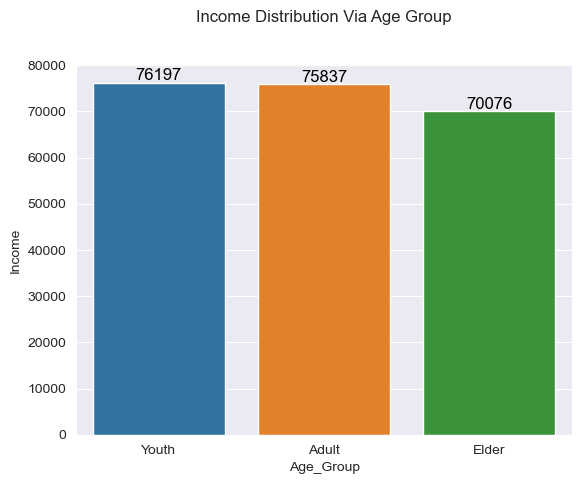

In [29]:
# Age Group with the highest income

ax = sns.barplot(data = df, x = 'Age_Group', y = 'Income',ci = None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    
ax.set_title('Income Distribution Via Age Group\n\n')  

plt.show()

In [30]:
# Checking the median income per age group

df.groupby('Age_Group')['Income'].median()

Age_Group
Adult    69000.0
Elder    60000.0
Youth    68000.0
Name: Income, dtype: float64

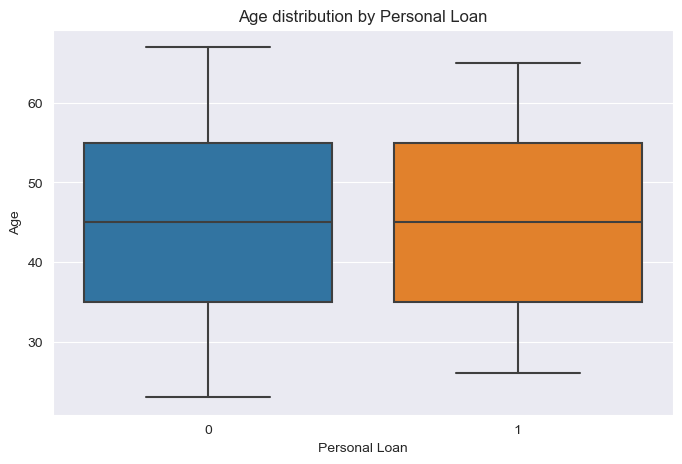

In [31]:
# plot of the age distribution of customers. Shows absense of outliers

plt.figure(figsize=(8,5))

sns.boxplot(x='Personal Loan', y='Age', data=df)
plt.title('Age distribution by Personal Loan')
plt.show()

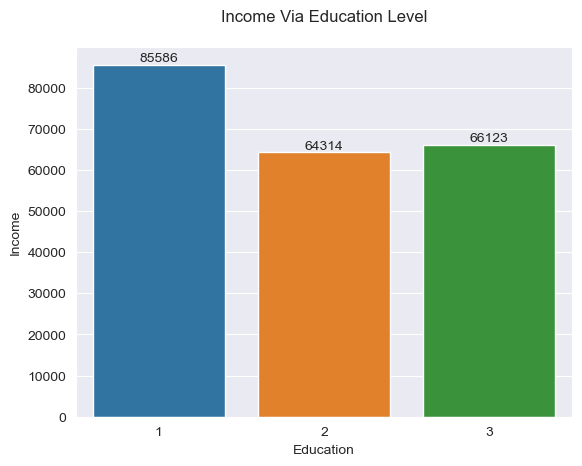

In [32]:
# Education with the highest income

ax = sns.barplot(data = df, x = 'Education', y = 'Income',ci = None)
ax.bar_label(ax.containers[0], fmt='%.0f')

plt.title('Income Via Education Level\n')
plt.show()


In [33]:
# checking the median Income for each Educational Level

df.groupby('Education')['Income'].median()

Education
1    79000.0
2    54000.0
3    59000.0
Name: Income, dtype: float64

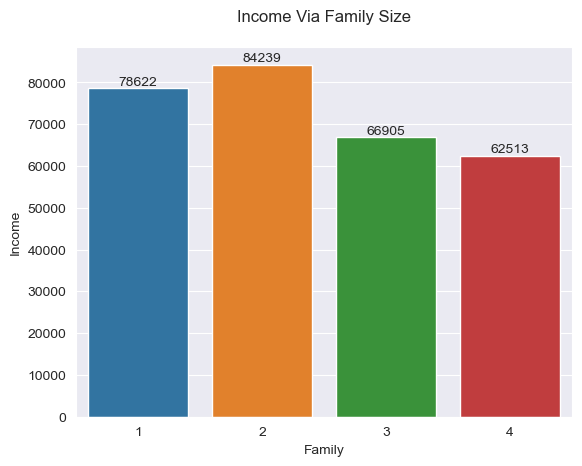

In [34]:
# Family Size with the highest income

ax = sns.barplot(data = df, x = 'Family', y = 'Income',ci = None)

ax.bar_label(ax.containers[0], fmt='%.0f')

plt.title('Income Via Family Size\n')
plt.show()

In [35]:
df['Education'].value_counts()/df.shape[0]

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

## `NOTES`

- On an average, Youths having their age group less than 35 years earn slightly higher compared to adults and the elderly. <br><br>
- Undergraduates with an Educational level of 1 have an average higher income compared to graduates and professionals. This might be due to the fact that about 40% of Jeseits customer data are undergraduates.<br><br>
- Customers with a family size of two have a higher average income compared to other groups.<br><br>

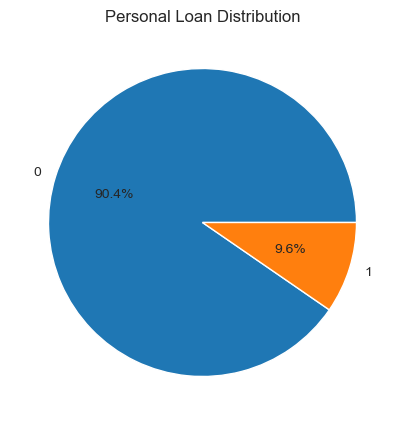

In [36]:
# Personal Loan 

plt.figure(figsize = (5,5))

personal_loan = df['Personal Loan'].value_counts()

plt.pie(personal_loan, labels=personal_loan.index, autopct='%1.1f%%')
plt.title('Personal Loan Distribution')

plt.show()

### ` Only Approximately 10% of their entire customer base subscribe to Personal Loans.`

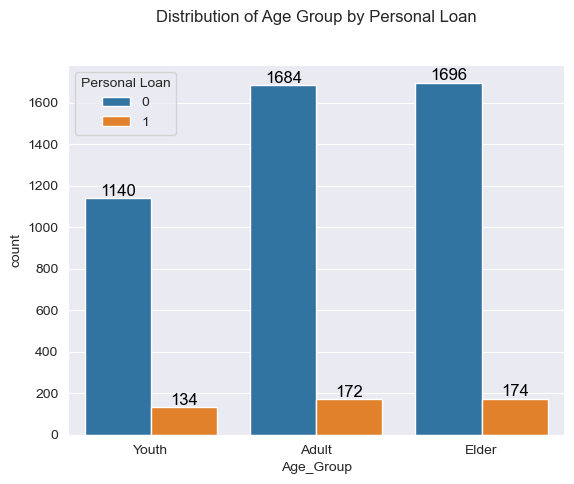

In [37]:
# Age Group with the highest income and personal loan

ax = sns.countplot(data = df, x = 'Age_Group', hue = 'Personal Loan')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.title('Distribution of Age Group by Personal Loan\n\n')
plt.show()

### ` There is an overall low subscription rate to Personal Loans, adults and elders subscribe more than youths.`

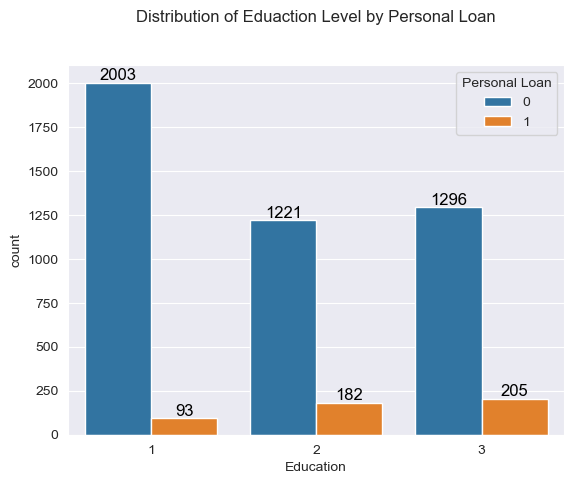

In [38]:
# Eduaction Level by Personal Loan

ax = sns.countplot(data = df, x = 'Education', hue = 'Personal Loan')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    

plt.title('Distribution of Eduaction Level by Personal Loan\n\n')
plt.show()

### ` From the above, professionals and graduates subscribe more to Personal Loans than undergraduates.`




.

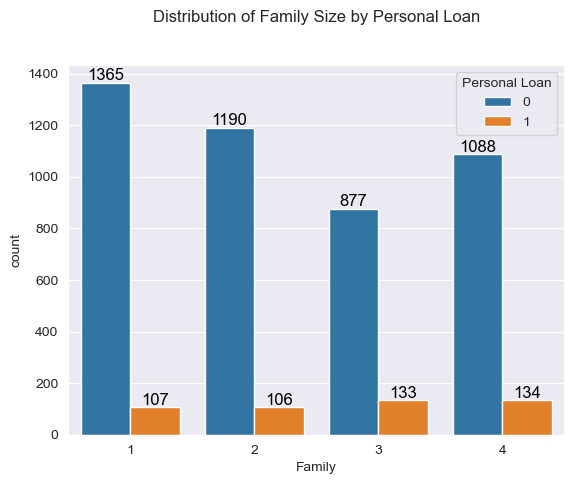

In [39]:
# Family Size by Personal Loan


ax = sns.countplot(data = df, x = 'Family', hue = 'Personal Loan')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.title('Distribution of Family Size by Personal Loan\n\n')
plt.show()


### ` Jeseits have more customers in the Family size 1 category, however the most subscription for Personal Loans are obtained from customers with a family of 4.`




.

In [40]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family',
       'Avg CardSpends', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Age_Group'],
      dtype='object')

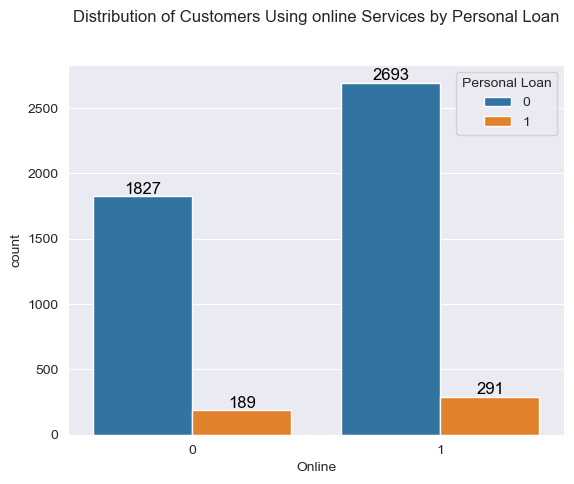

In [41]:
# Online Customers by Personal Loan


ax = sns.countplot(data = df, x = 'Online', hue = 'Personal Loan')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.title('Distribution of Customers Using online Services by Personal Loan\n\n')
plt.show()


### ` A high percentage of customers use the online banking system. Customers who utilize this online banking platform subscribe more to Personal Loans than others.`




.

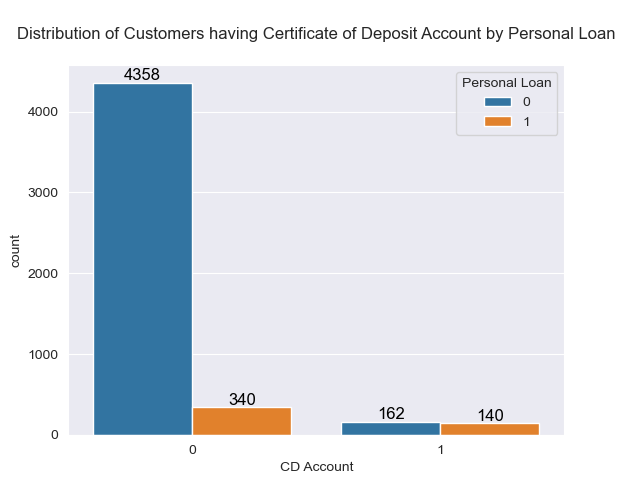

In [42]:
# CD Account Customers by Personal Loan


ax = sns.countplot(data = df, x = 'CD Account', hue = 'Personal Loan')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.title('\nDistribution of Customers having Certificate of Deposit Account by Personal Loan\n')
plt.show()


### ` Over 90% of customers do not possess the Certificate of Deposit and we have more Personal Loan subscription coming from them.`




.

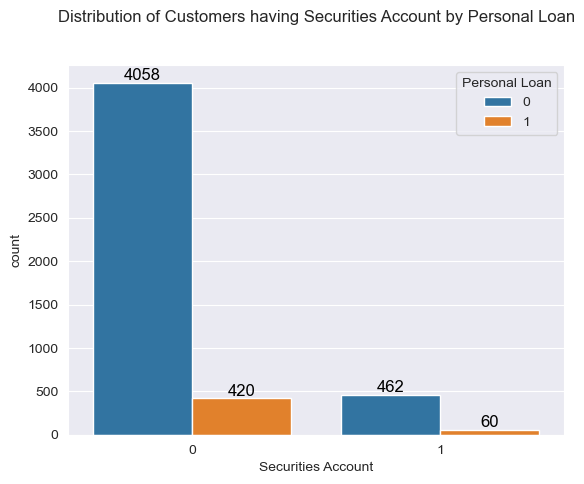

In [43]:
# Securities Account Customers by Personal Loan


ax = sns.countplot(data = df, x = 'Securities Account', hue = 'Personal Loan')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
plt.title('Distribution of Customers having Securities Account by Personal Loan\n\n')
plt.show()


------------------------------------
------------------------------------

###  A higher percentage (Over 80%) of customers do not have a security account with the bank. These customers subscribe more to the loan compared to those with security accounts.`




.

<AxesSubplot:>

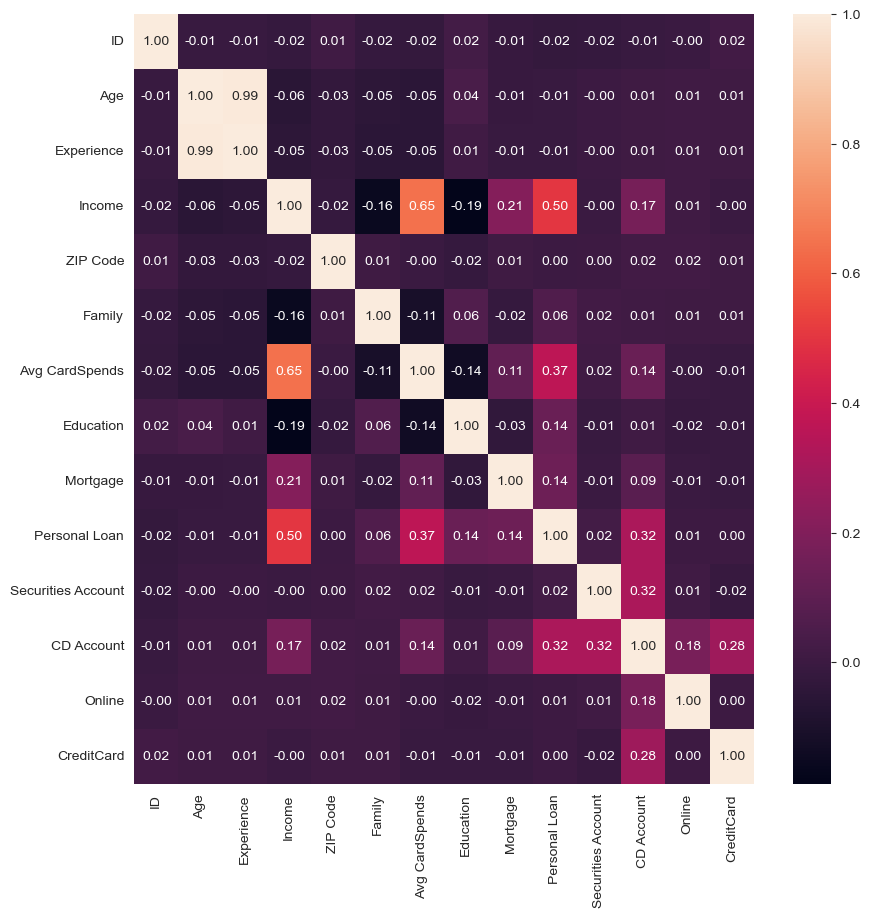

In [44]:
# checking for the relationship between column features


plt.figure(figsize = (10,10))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')

## Notes 
<br><br>

<span style="font-size:16px;">


- A strong positive correlation exists between Age and experience depicting that the higher the age of customer, the more advanced the experience level. (Since both features communicate similar info, we would be dropping one to ensure model optimization).<br><br>

- A moderate positive correlation exists between income and Personal loan and also income and average card spendings. This shows that the higher the income level of the customer, the higher the average spending amount via cards ona a monthly bases and also, the likelihood of subscribing to personal loans.</span>

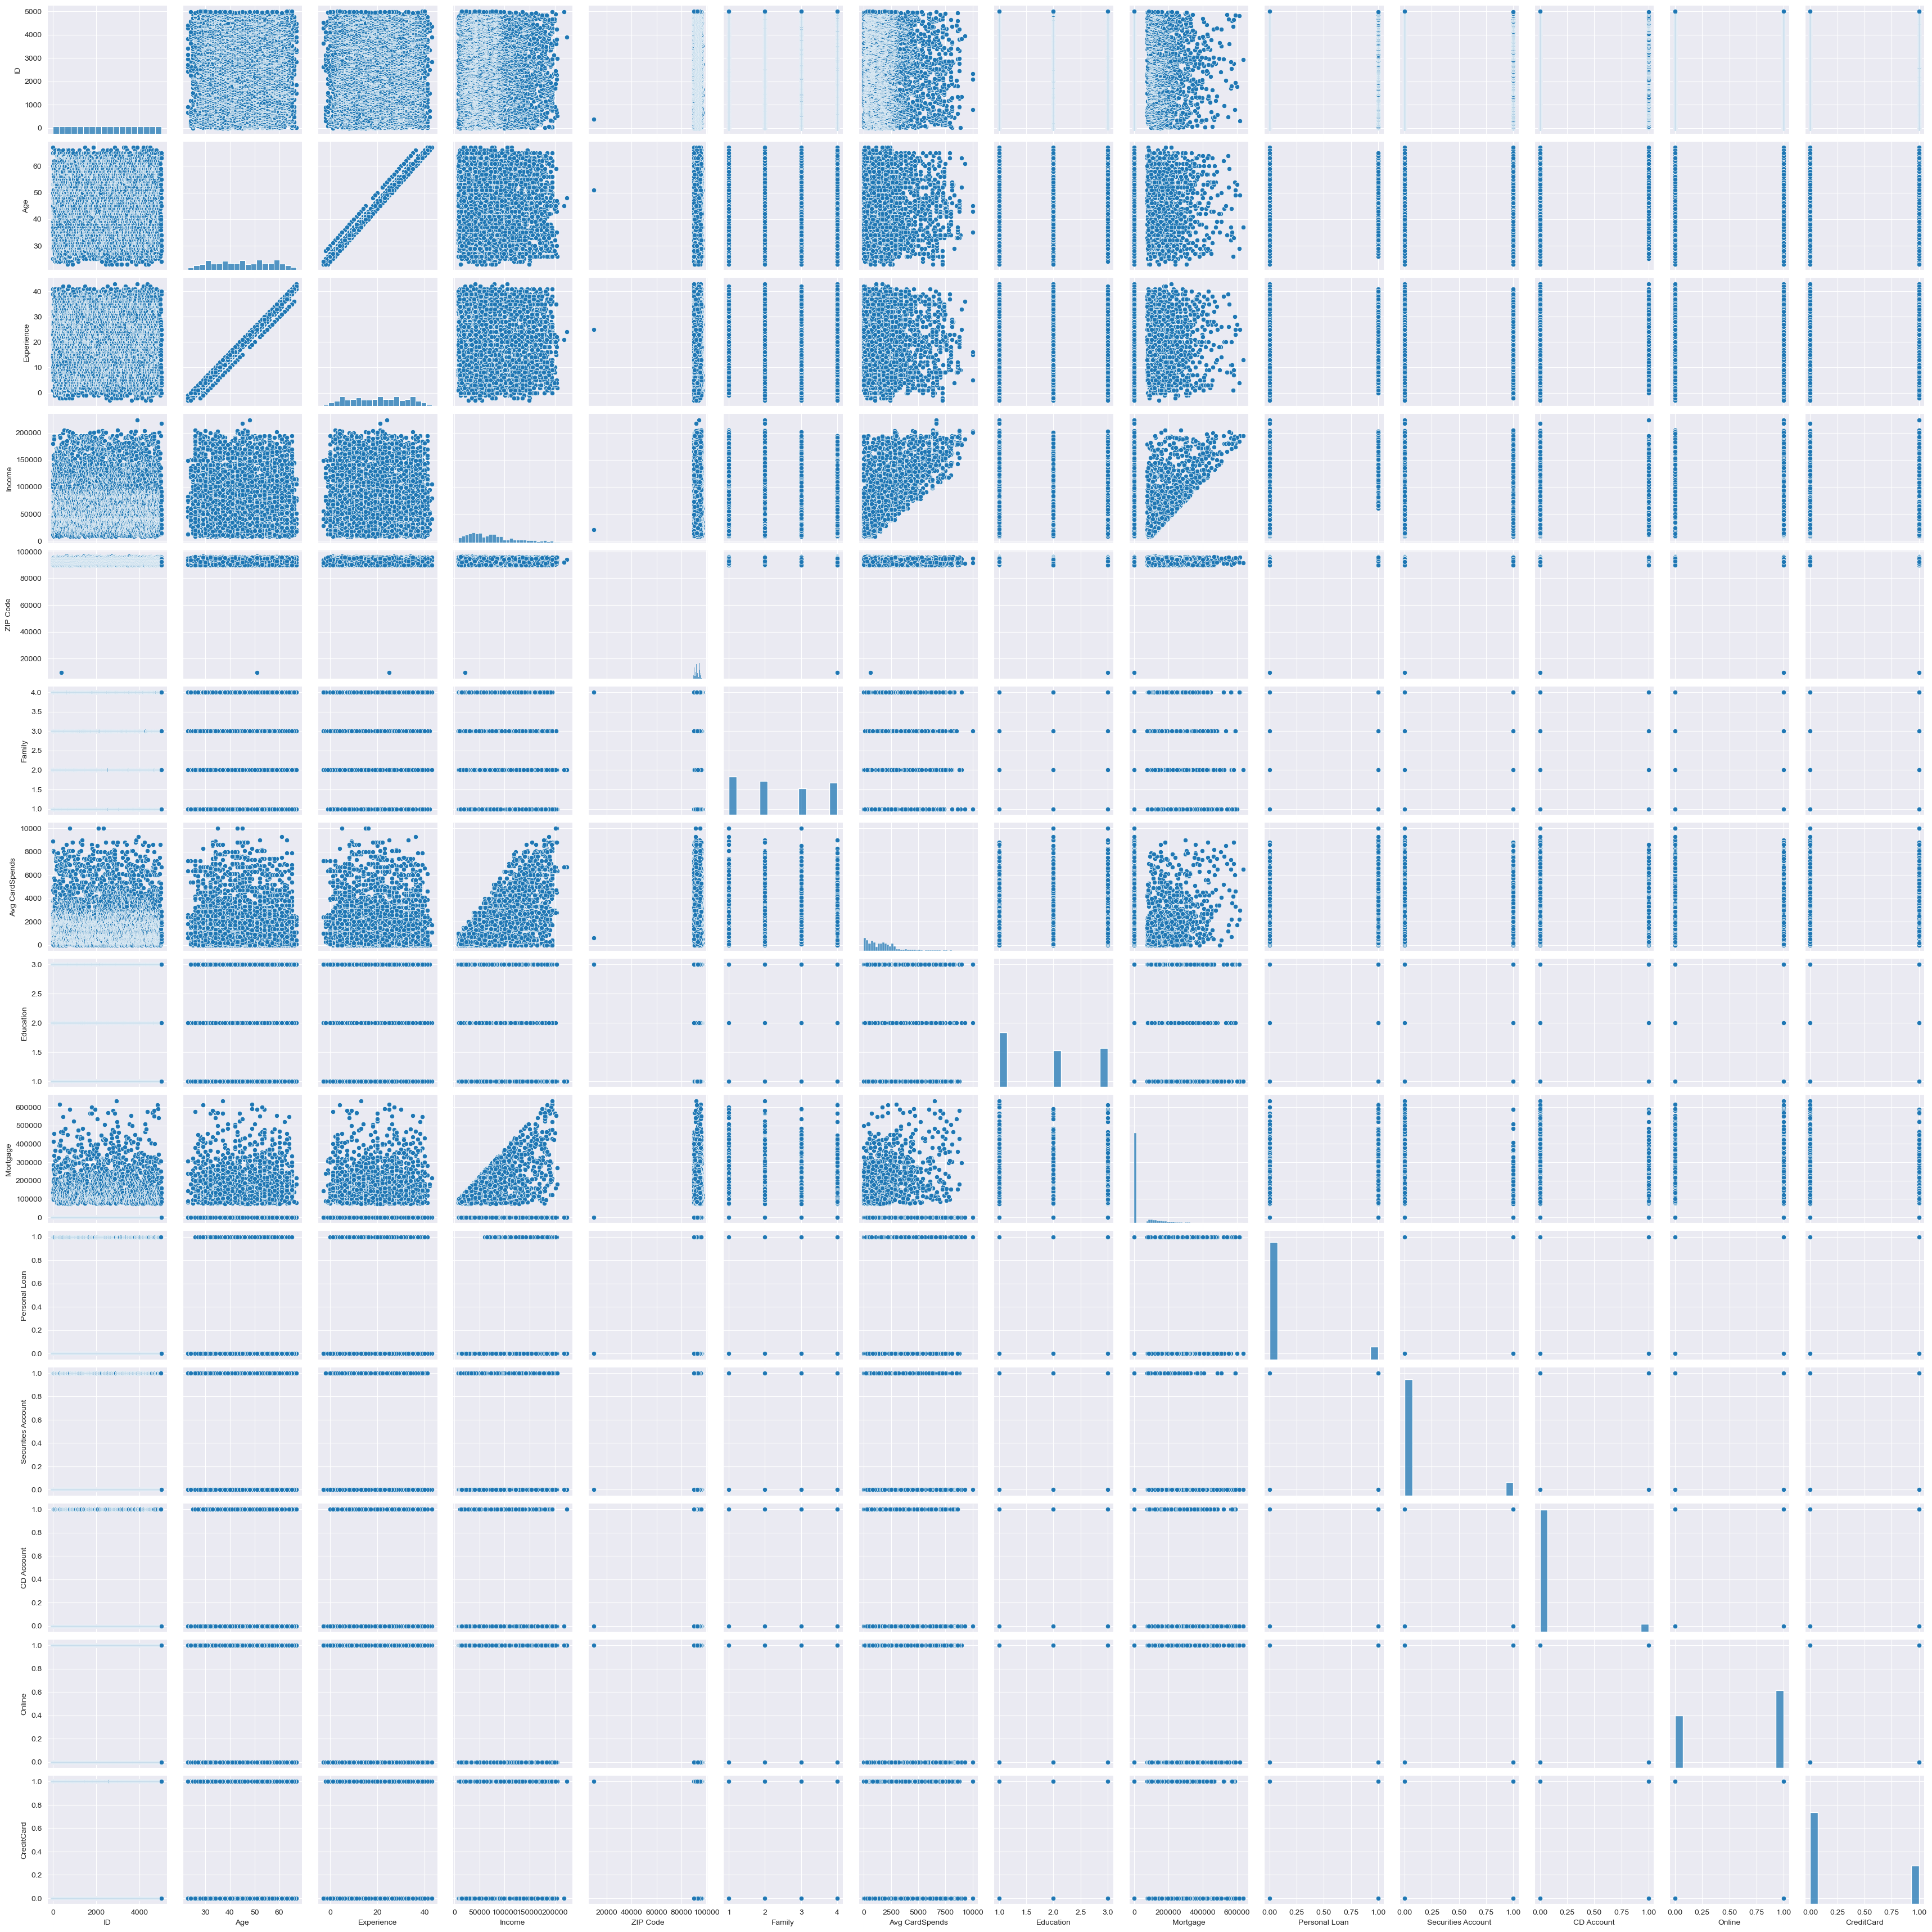

In [45]:
sns.pairplot(df)

<Figure size 1200x1500 with 0 Axes>

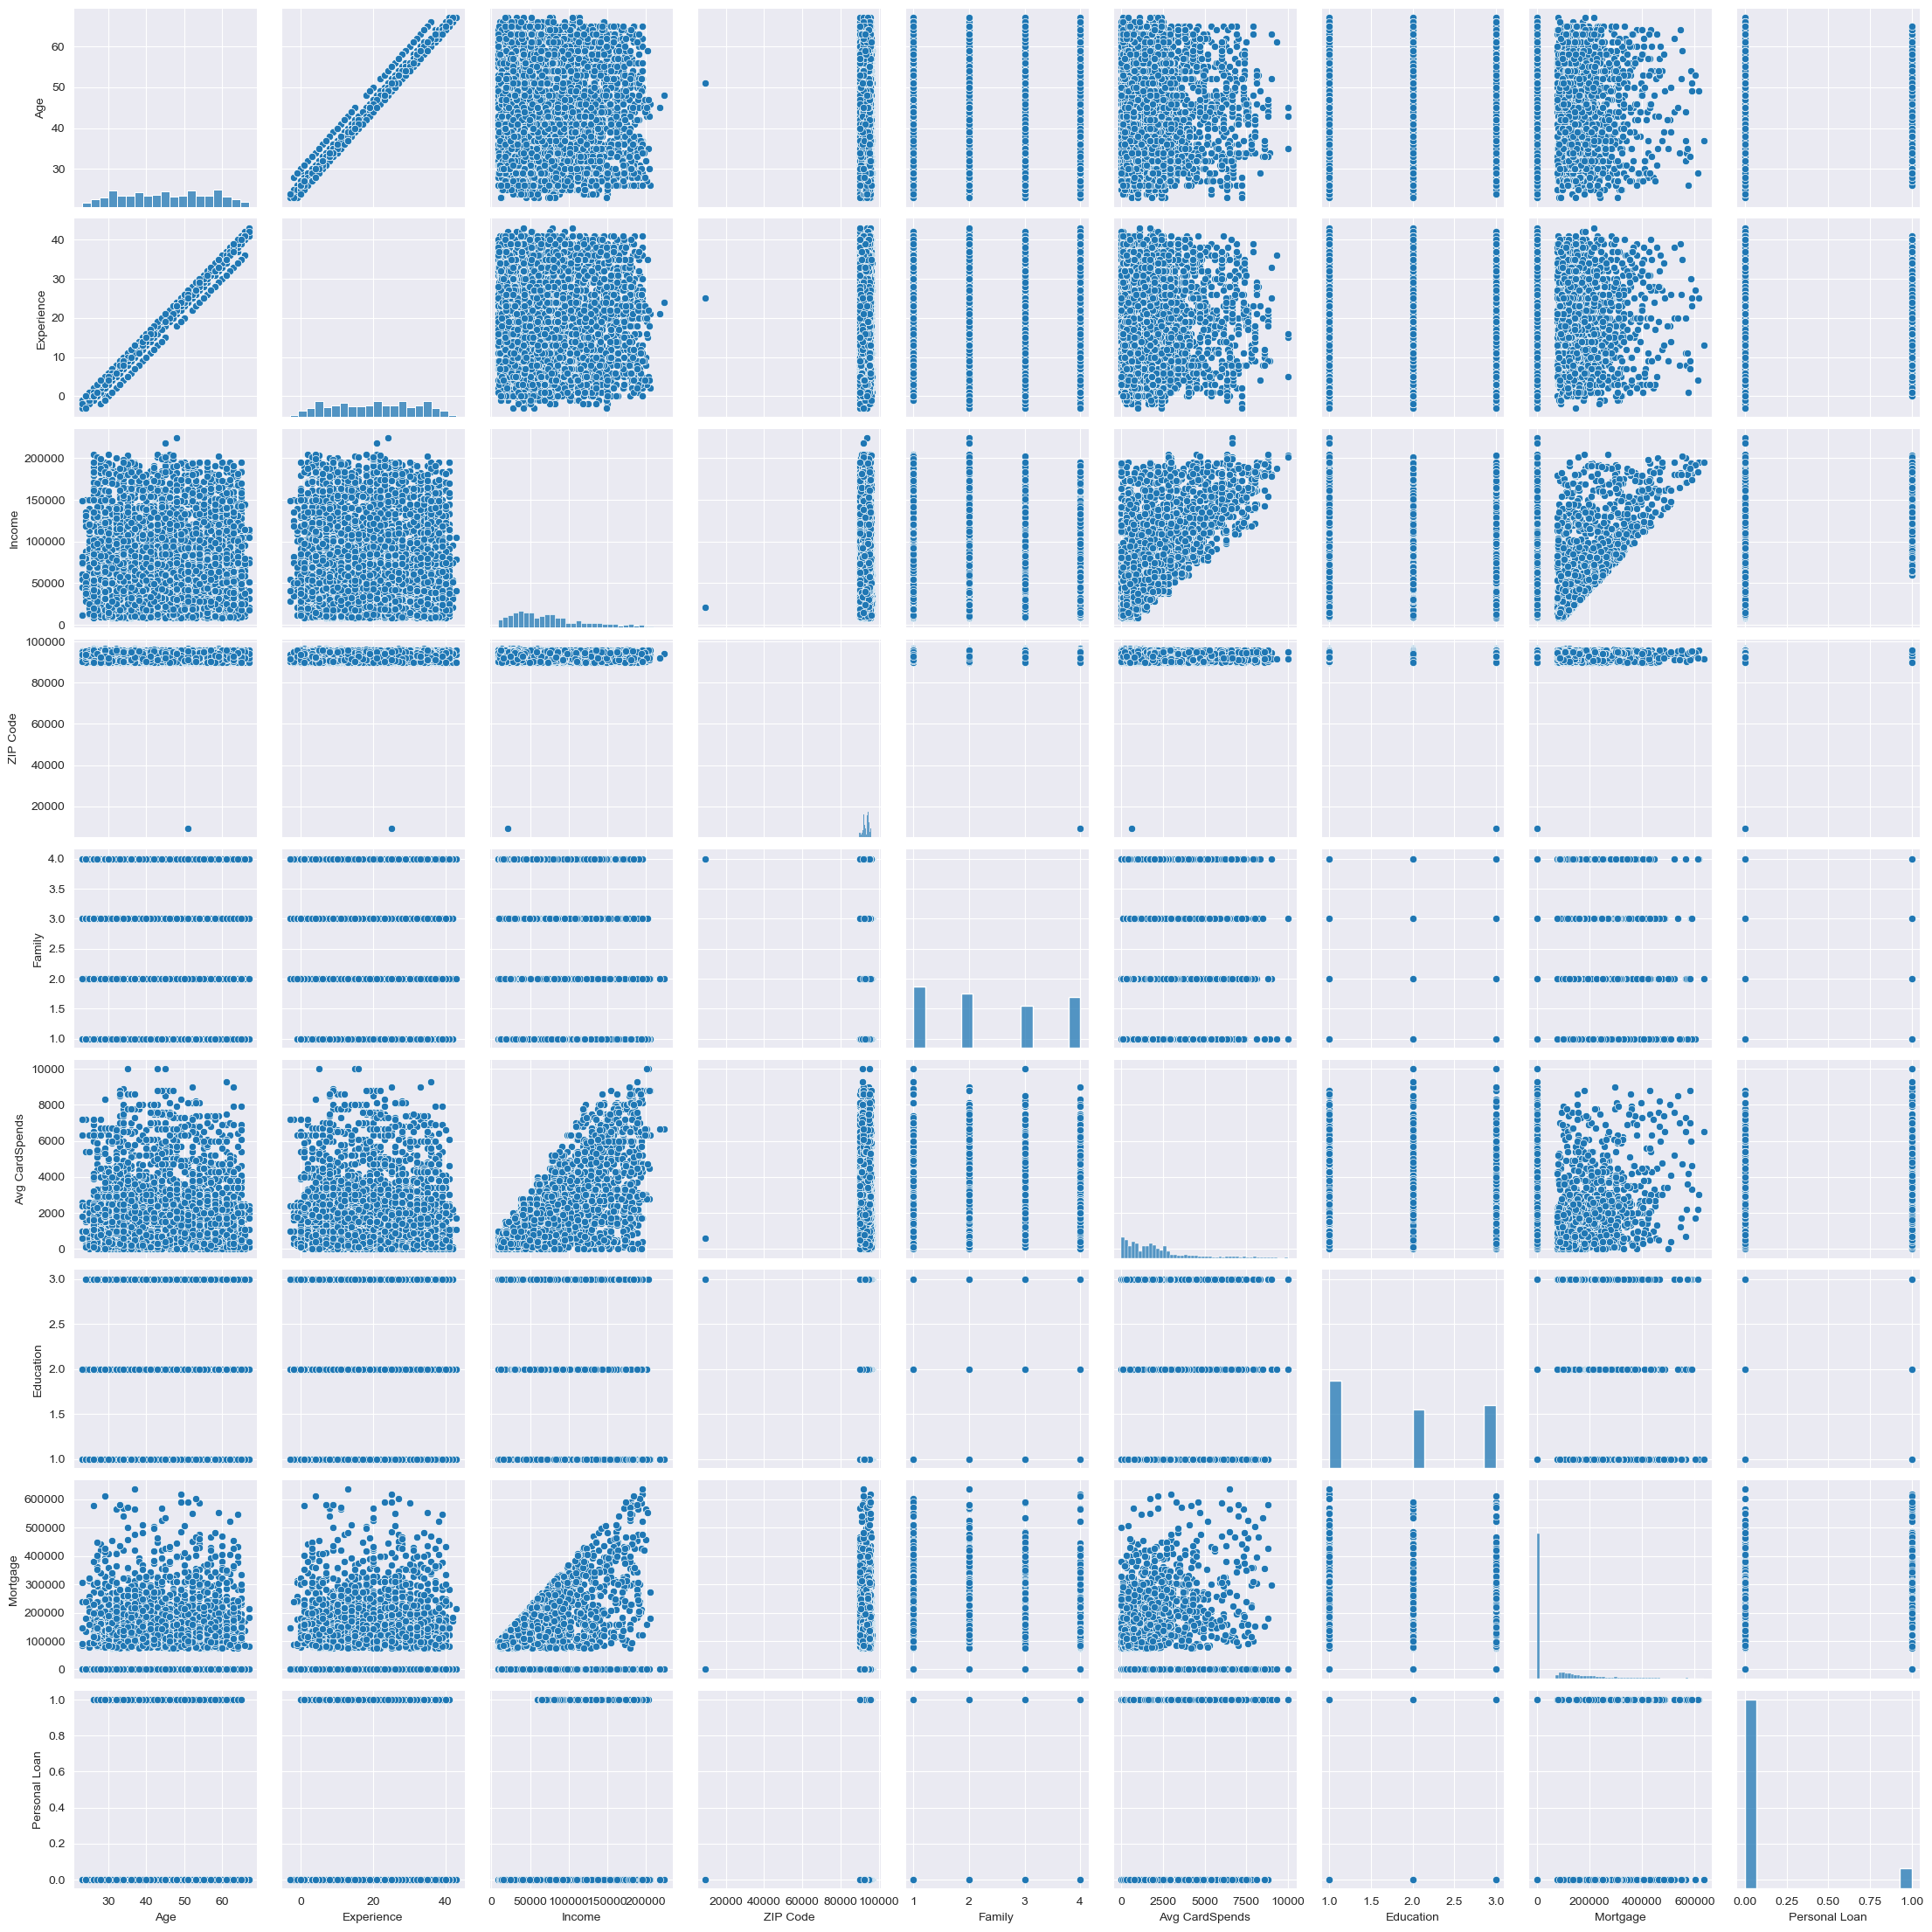

In [46]:
# pair plot of column features

plt.figure(figsize = (12,15))

sns.pairplot(df[df.columns[1:-5]])
plt.show()

` A strong possitive relatonship exists between experience level and age

<a id='model'></a>
## ML Modeling

------------------------------------
------------------------------------

> Notes;
1. Address imbalanced data using SMOTE technique
2. Perform featture scaling to optimize model output using Robust Scaling technique

------------------------------------
------------------------------------

### installing imblearn library

pip install imbalanced-learn

In [48]:
# importing the neccessary libraries

# Balancing the data
import imblearn
from imblearn.over_sampling import SMOTE

# Since the data conatins outliers
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# importing ml algorithms
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [49]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  Avg CardSpends  Education  \
0   1   25           1   49000     91107       4          1600.0          1   
1   2   45          19   34000     90089       3          1500.0          1   
2   3   39          15   11000     94720       1          1000.0          1   
3   4   35           9  100000     94112       1          2700.0          2   
4   5   35           8   45000     91330       4          1000.0          2   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0         0              0                   1           0       0   
1         0              0                   1           0       0   
2         0              0                   0           0       0   
3         0              0                   0           0       0   
4         0              0                   0           0       0   

   CreditCard Age_Group  
0           0     Youth  
1           0     Adult  
2           0     Adult  
3           0     Youth  
4           1     Youth

In [50]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family',
       'Avg CardSpends', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Age_Group'],
      dtype='object')

In [51]:
# selecting the column features

dfm = df[['Age', 'Income', 'ZIP Code', 'Family',
       'Avg CardSpends', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard']]

In [52]:
dfm.head()

Age  Income  ZIP Code  Family  Avg CardSpends  Education  Mortgage  \
0   25   49000     91107       4          1600.0          1         0   
1   45   34000     90089       3          1500.0          1         0   
2   39   11000     94720       1          1000.0          1         0   
3   35  100000     94112       1          2700.0          2         0   
4   35   45000     91330       4          1000.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [53]:
# splitting the data into target and predictor variables

x = dfm.drop('Personal Loan', axis = 1)
y = dfm['Personal Loan']


In [54]:
x.head()

Age  Income  ZIP Code  Family  Avg CardSpends  Education  Mortgage  \
0   25   49000     91107       4          1600.0          1         0   
1   45   34000     90089       3          1500.0          1         0   
2   39   11000     94720       1          1000.0          1         0   
3   35  100000     94112       1          2700.0          2         0   
4   35   45000     91330       4          1000.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [55]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [56]:
# Splitting the data into training and testing set

x_train, x_test, y_train,y_test= train_test_split(x, y, test_size = 0.3, random_state= 0 )

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(3500, 11)
(1500, 11)
(3500,)
(1500,)


## `Balancing the target column.`

In [58]:
# before application of SMOTE

y_train.value_counts()

0    3148
1     352
Name: Personal Loan, dtype: int64

In [59]:
# balancing the dataset to contain equal personal loan distribution in the train dataset
smote = SMOTE()

x_re, y_re = smote.fit_resample(x_train, y_train)

In [60]:
# after application of SMOTE

y_re.value_counts()

0    3148
1    3148
Name: Personal Loan, dtype: int64

## `Feature Scaling.`

In [63]:
cols = x_re.columns
cols

Index(['Age', 'Income', 'ZIP Code', 'Family', 'Avg CardSpends', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [65]:
# scaling the data

rb = RobustScaler()

# fit and training the data
x_train = rb.fit_transform(x_re)
x_train_scaled = pd.DataFrame(x_train, columns= cols)

# tranforming the test set
x_test = rb.transform(x_test)
x_test_scaled = pd.DataFrame(x_test, columns= cols)

In [66]:
x_test_scaled.head()

Age    Income   ZIP Code  Family  Avg CardSpends  Education  Mortgage  \
0 -2.413580 -1.232650 -35.341035   -1.00       -0.836578       -3.0  0.000000   
1 -2.478395 -1.232642 -35.341130   -1.25       -0.836612       -3.0  0.000000   
2 -2.413580 -1.232644 -35.341130   -0.75       -0.836466       -1.0  0.000016   
3 -2.481481 -1.232643 -35.340963   -0.50       -0.836421       -1.0  0.000000   
4 -2.456790 -1.232638 -35.341404   -1.00       -0.835940       -3.0  0.000015   

   Securities Account  CD Account  Online  CreditCard  
0                 0.0         0.0     0.0         0.0  
1                 0.0         0.0     1.0         0.0  
2                 0.0         0.0     0.0         1.0  
3                 0.0         0.0     1.0         0.0  
4                 0.0         0.0     1.0         0.0

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



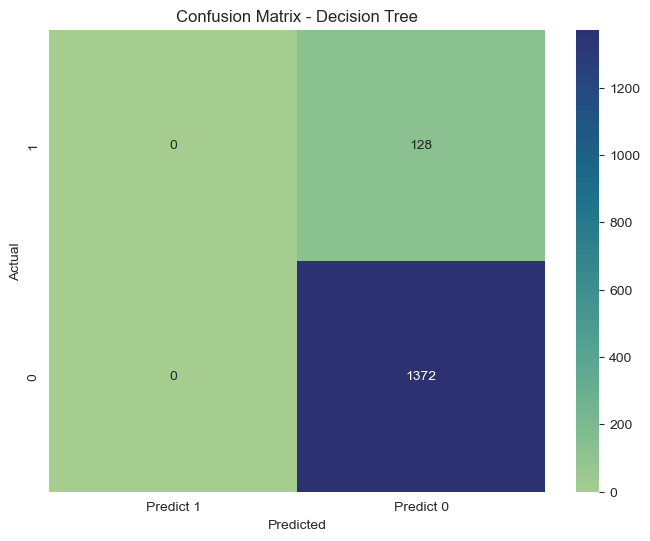





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



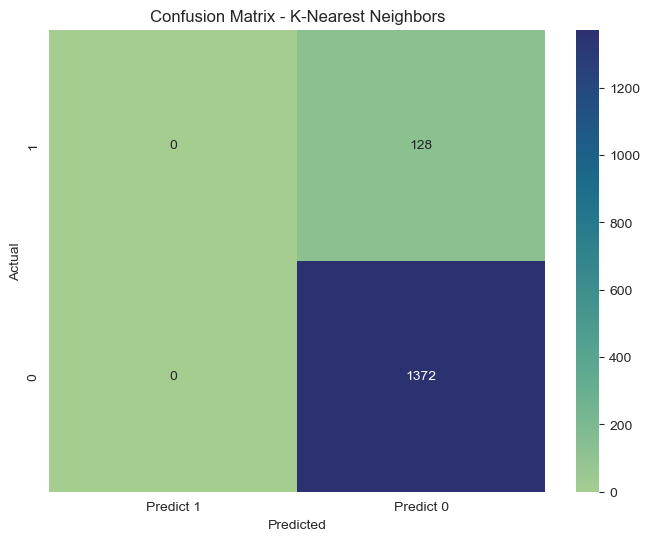





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



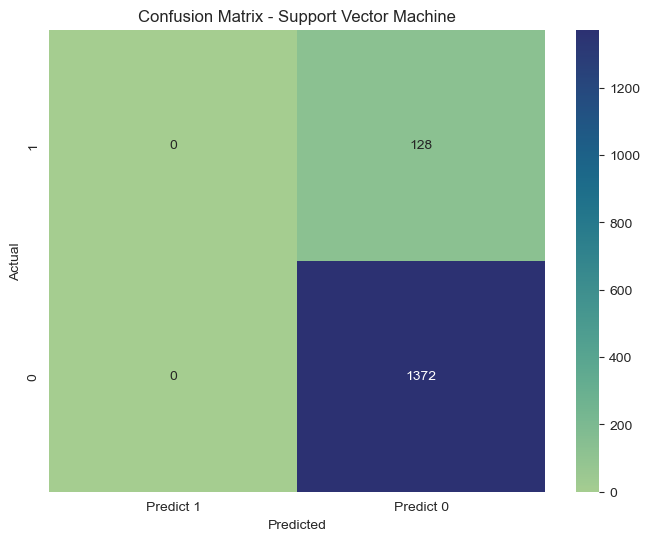





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



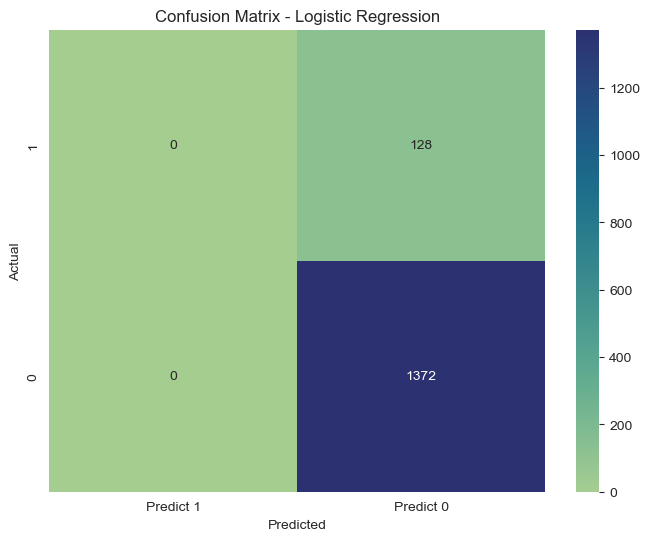





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



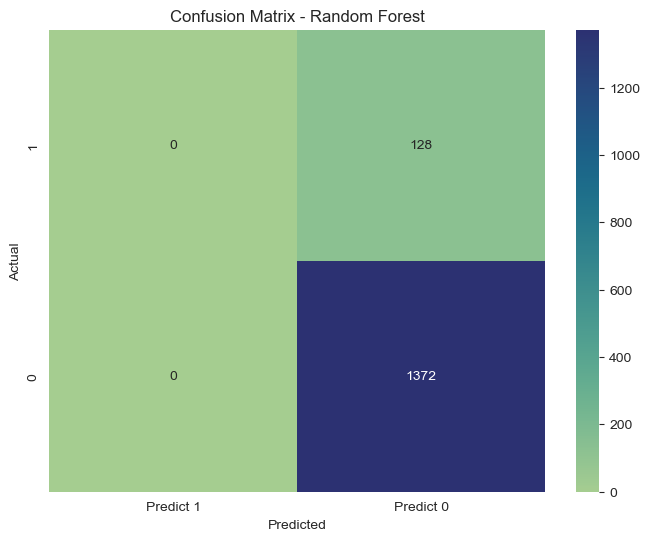





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



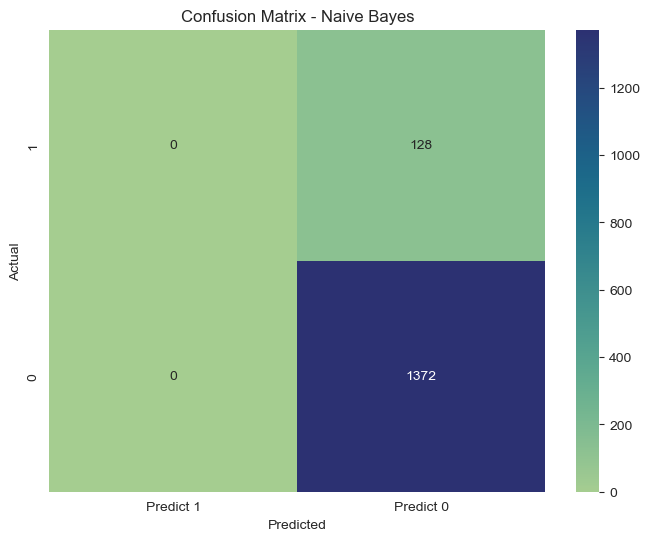





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



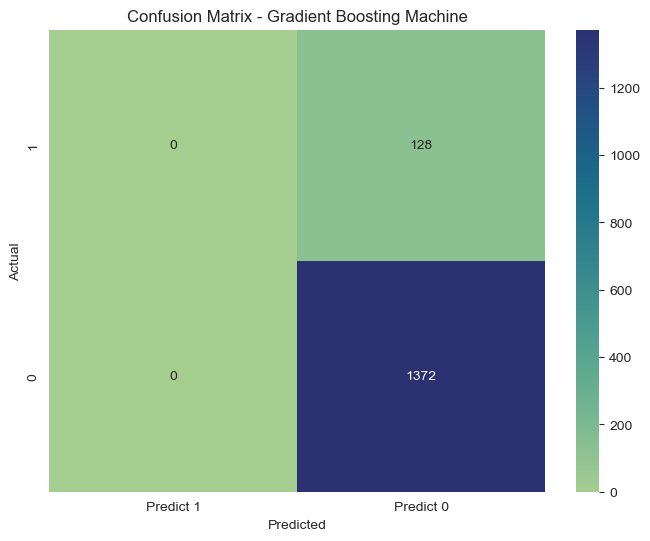





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



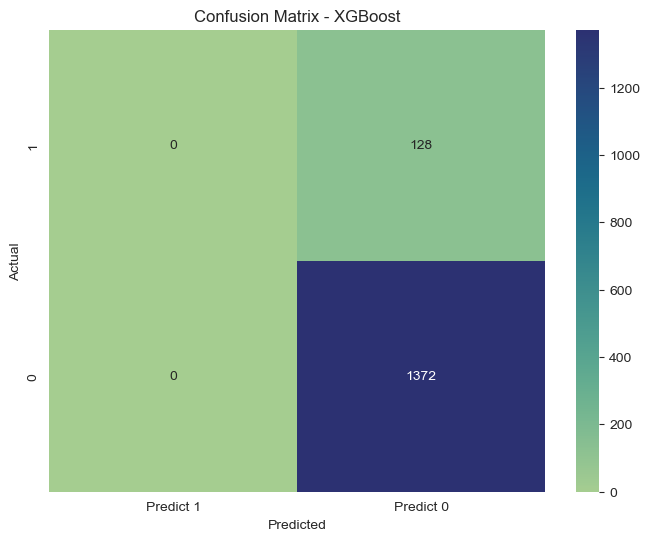

In [69]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(x_train_scaled, y_re)
    
    # Predict on the test set
    y_pred = classifier.predict(x_test_scaled)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels = [1,0])
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(cm, annot=True, cmap="crest", fmt="d", yticklabels= ['1', '0'], xticklabels=['Predict 1', 'Predict 0'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    
    # Add a separator for clarity
    print("="*100)
    print('\n\n\n')

In [70]:

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(x_test_scaled)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)
    

Model  Accuracy  Precision    Recall  F1-Score
0              Decision Tree  0.914667   0.836615  0.914667  0.873902
1        K-Nearest Neighbors  0.914667   0.836615  0.914667  0.873902
2     Support Vector Machine  0.914667   0.836615  0.914667  0.873902
3        Logistic Regression  0.914667   0.836615  0.914667  0.873902
4              Random Forest  0.914667   0.836615  0.914667  0.873902
5                Naive Bayes  0.914667   0.836615  0.914667  0.873902
6  Gradient Boosting Machine  0.914667   0.836615  0.914667  0.873902
7                    XGBoost  0.914667   0.836615  0.914667  0.873902

## XGBoost returned a higher Accuracy and F1 Score compared to the other algorithms.